<a href="https://colab.research.google.com/github/ewuerfel66/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/EricWuerfel_DS_Unit_1_Sprint_Challenge_2_Data_Wrangling_and_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 2

## Data Wrangling and Storytelling

Taming data from its raw form into informative insights and stories.

### Imports

In [0]:
import seaborn as sns

## Data Wrangling

In this Sprint Challenge you will first "wrangle" some data from [Gapminder](https://www.gapminder.org/about-gapminder/), a Swedish non-profit co-founded by Hans Rosling. "Gapminder produces free teaching resources making the world understandable based on reliable statistics."
- [Cell phones (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv)
- [Population (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Geo country codes](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/ddf--entities--geo--country.csv)

These two links have everything you need to successfully complete the first part of this sprint challenge.
- [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html) (one question)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (everything else)

### Part 0. Load data

You don't need to add or change anything here. Just run this cell and it loads the data for you, into three dataframes.

In [0]:
import pandas as pd

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))

In [259]:
cell_phones.head()

,geo,time,cell_phones_total
0,abw,1960,0.0
1,abw,1965,0.0
2,abw,1970,0.0
3,abw,1975,0.0
4,abw,1976,0.0


In [260]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [261]:
geo_country_codes.head()

,geo,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,country,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,nan,NaN,NaN,nan,nan,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.5,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.0,66.0,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.5,18.5,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


### Part 1. Join data

First, join the `cell_phones` and `population` dataframes (with an inner join on `geo` and `time`).

The resulting dataframe's shape should be: (8590, 4)

In [0]:
df = pd.merge(cell_phones, population, how='inner', on=['geo', 'time'])

In [263]:
df.shape

(8590, 4)

In [264]:
df.head()

,geo,time,cell_phones_total,population_total
0,afg,1960,0.0,8996351
1,afg,1965,0.0,9938414
2,afg,1970,0.0,11126123
3,afg,1975,0.0,12590286
4,afg,1976,0.0,12840299


Then, select the `geo` and `country` columns from the `geo_country_codes` dataframe, and join with your population and cell phone data.

The resulting dataframe's shape should be: (8590, 5)

In [0]:
country_codes = geo_country_codes[['geo', 'country']]

In [0]:
df = pd.merge(df, country_codes, left_on="geo", right_on="geo")

In [267]:
df.shape

(8590, 5)

***Optional bonus for Part 1: Take initiative to join more data.***

### Part 2. Make features

Calculate the number of cell phones per person, and add this column onto your dataframe.

(You've calculated correctly if you get 1.220 cell phones per person in the United States in 2017.)

In [0]:
df['cells_per_person'] = True

In [0]:
df['cells_per_person'] = df['cell_phones_total'] / df['population_total']

In [270]:
df[df['country'] == "United States"].tail()

,geo,time,cell_phones_total,population_total,country,cells_per_person
8130,usa,2013,"310,698,000.0",315536676,United States,0.9846652501340288
8131,usa,2014,"355,500,000.0",317718779,United States,1.118914031833164
8132,usa,2015,"382,307,000.0",319929162,United States,1.1949739048796058
8133,usa,2016,"395,881,000.0",322179605,United States,1.228758722948959
8134,usa,2017,"395,881,000.0",324459463,United States,1.2201246847283354


Modify the `geo` column to make the geo codes uppercase instead of lowercase.

In [0]:
df['geo'] = df['geo'].str.upper()

In [272]:
df[df['country'] == "United States"].tail()

,geo,time,cell_phones_total,population_total,country,cells_per_person
8130,USA,2013,"310,698,000.0",315536676,United States,0.9846652501340288
8131,USA,2014,"355,500,000.0",317718779,United States,1.118914031833164
8132,USA,2015,"382,307,000.0",319929162,United States,1.1949739048796058
8133,USA,2016,"395,881,000.0",322179605,United States,1.228758722948959
8134,USA,2017,"395,881,000.0",324459463,United States,1.2201246847283354


***Optional bonus for Part 2: Take initiative to make more features.***

### Part 3. Process data

Use the describe function, to describe your dataframe's numeric columns, and then its non-numeric columns.

(You'll see the time period ranges from 1960 to 2017, and there are 195 unique countries represented.)

#### Numeric

In [273]:
df.describe(include=np.number)

,time,cell_phones_total,population_total,cells_per_person
count,"8,590.0","8,590.0","8,590.0","8,590.0"
mean,"1,994.1934807916182","9,004,949.642905472","29,838,230.581722934",0.2796385558059151
std,14.257974607310302,"55,734,084.872179635","116,128,377.47477299",0.454246656214052
min,"1,960.0",0.0,"4,433.0",0.0
25%,"1,983.0",0.0,"1,456,148.0",0.0
50%,"1,995.0","6,200.0","5,725,062.5",0.0015636266438163813
75%,"2,006.0","1,697,652.0","18,105,812.0",0.4611491855201403
max,"2,017.0","1,474,097,000.0","1,409,517,397.0",2.490242818521353


#### Non-Numeric

In [274]:
df.describe(exclude=np.number)

,geo,country
count,8590,8590
unique,195,195
top,NOR,Guyana
freq,46,46


#### Question #1

In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,474,097,000 |
|    ?    |     1,168,902,277 |
|    ?    |       458,923,202 |
|    ?    |       395,881,000 |
|    ?    |       236,488,548 |



In [0]:
df_2017 = df[df['time'] == 2017]

In [276]:
df_2017.sort_values(by="cell_phones_total", ascending=False).head()

,geo,time,cell_phones_total,population_total,country,cells_per_person
1496,CHN,2017,"1,474,097,000.0",1409517397,China,1.0458168186766978
3595,IND,2017,"1,168,902,277.0",1339180127,India,0.8728491809526382
3549,IDN,2017,"458,923,202.0",263991379,Indonesia,1.738402230172827
8134,USA,2017,"395,881,000.0",324459463,United States,1.2201246847283354
1084,BRA,2017,"236,488,548.0",209288278,Brazil,1.1299655683535224


#### Answer #1

**2017 Most Total Cell Phones**

* China
* India
* Indonesia
* United States
* Brazil

#### Question #2

2017 was the first year that China had more cell phones than people.

What was the first year that the USA had more cell phones than people?

In [0]:
usa = df[df['geo'] == "USA"]

In [278]:
usa[usa['cells_per_person'] >= 1].sort_values(by="time")

,geo,time,cell_phones_total,population_total,country,cells_per_person
8131,USA,2014,"355,500,000.0",317718779,United States,1.118914031833164
8132,USA,2015,"382,307,000.0",319929162,United States,1.1949739048796058
8133,USA,2016,"395,881,000.0",322179605,United States,1.228758722948959
8134,USA,2017,"395,881,000.0",324459463,United States,1.2201246847283354


#### Answer #2

**2014** was the first year the USA had more cell phones than people.

In [279]:
usa.tail(10)

,geo,time,cell_phones_total,population_total,country,cells_per_person
8125,USA,2008,"261,300,000.0",303374067,United States,0.8613129084629373
8126,USA,2009,"274,283,000.0",306076362,United States,0.8961260458264333
8127,USA,2010,"285,118,000.0",308641391,United States,0.9237840688710478
8128,USA,2011,"297,404,000.0",311051373,United States,0.9561250192584747
8129,USA,2012,"304,838,000.0",313335423,United States,0.9728807457559626
8130,USA,2013,"310,698,000.0",315536676,United States,0.9846652501340288
8131,USA,2014,"355,500,000.0",317718779,United States,1.118914031833164
8132,USA,2015,"382,307,000.0",319929162,United States,1.1949739048796058
8133,USA,2016,"395,881,000.0",322179605,United States,1.228758722948959
8134,USA,2017,"395,881,000.0",324459463,United States,1.2201246847283354


***Optional bonus for Part 3: Take initiative to do more exploratory data analysis.***

In [280]:
df_2017.sort_values(by="cells_per_person", ascending=False).head(20)

,geo,time,cell_phones_total,population_total,country,cells_per_person
3319,HKG,2017,"18,340,347.0",7364883,"Hong Kong, China",2.490242818521353
219,ARE,2017,"19,826,224.0",9400145,United Arab Emirates,2.109140231347495
5056,MDV,2017,"900,120.0",436330,Maldives,2.0629340178305413
1860,CRI,2017,"8,840,342.0",4905769,Costa Rica,1.8020298142859967
7393,SYC,2017,"167,282.0",94737,Seychelles,1.7657515015252752
7576,THA,2017,"121,530,000.0",69037513,Thailand,1.7603473056742354
3549,IDN,2017,"458,923,202.0",263991379,Indonesia,1.738402230172827
442,AUT,2017,"14,924,340.0",8735453,Austria,1.7084792282666967
5335,MNE,2017,"1,044,674.0",628960,Montenegro,1.6609545917069448
8497,ZAF,2017,"91,878,275.0",56717156,South Africa,1.619937977849242


### (OPTIONAL) Part 4. Reshape data

*This part is not needed to pass the sprint challenge, only to get a 3! Only work on this after completing the other sections.*

Create a pivot table:
- Columns: Years 2007—2017
- Rows: China, India, United States, Indonesia, Brazil (order doesn't matter)
- Values: Cell Phones Total

The table's shape should be: (5, 11)

Sort these 5 countries, by biggest increase in cell phones from 2007 to 2017.

Which country had 935,282,277 more cell phones in 2017 versus 2007?

If you have the time and curiosity, what other questions can you ask and answer with this data?

## Data Storytelling

In this part of the sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

### Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv'
df = pd.read_csv(url).rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'})

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df['Occupation'] = df['Group'].apply(get_occupation)

In [282]:
df.head()

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
2,1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"
3,1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy & Music"
4,1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy & Music"


### Part 1 — What's the breakdown of guests’ occupations per year?

For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, **for each year of _The Daily Show_, calculate the percentage of guests from each occupation:**
- Acting, Comedy & Music
- Government and Politics
- Media
- Other

#### Hints:
You can make a crosstab. (See pandas documentation for examples, explanation, and parameters.)

You'll know you've calculated correctly when the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015.

**Optional Bonus Challenge:** Do additional insightful data exploration.

In [0]:
tab = pd.crosstab(df['Year'], df['Occupation'])

In [0]:
tab['ACM Proportion'] = True
tab['GP Proportion'] = True
tab['Media Proportion'] = True
tab['Other Proportion'] = True

# Add year column that's not the index
years = list(range(1999, 2016))
tab['year'] = years

# To check:
tab['prop_sum'] = True

In [0]:
tab['ACM Proportion'] = (tab['Acting, Comedy & Music'] / (tab['Government and Politics']+tab['Media']+tab['Other']+tab['Acting, Comedy & Music']))*100
tab['GP Proportion'] = (tab['Government and Politics'] / (tab['Government and Politics']+tab['Media']+tab['Other']+tab['Acting, Comedy & Music']))*100
tab['Media Proportion'] = (tab['Media'] / (tab['Government and Politics']+tab['Media']+tab['Other']+tab['Acting, Comedy & Music']))*100
tab['Other Proportion'] = (tab['Other'] / (tab['Government and Politics']+tab['Media']+tab['Other']+tab['Acting, Comedy & Music']))*100

# To check:
tab['prop_sum'] = tab['ACM Proportion']+tab['GP Proportion']+tab['Media Proportion']+tab['Other Proportion']

In [286]:
tab

Occupation,"Acting, Comedy & Music",Government and Politics,Media,Other,ACM Proportion,GP Proportion,Media Proportion,Other Proportion,year,prop_sum
Year,,,,,,,,,,
1999,150,2,11,3,90.36144578313254,1.2048192771084338,6.626506024096386,1.8072289156626504,1999,100.0
2000,125,14,21,9,73.96449704142012,8.284023668639055,12.42603550295858,5.325443786982249,2000,100.0
2001,114,6,31,6,72.61146496815286,3.821656050955414,19.745222929936308,3.821656050955414,2001,99.99999999999999
2002,99,11,42,7,62.264150943396224,6.918238993710692,26.41509433962264,4.40251572327044,2002,100.0
2003,93,17,41,15,56.024096385542165,10.240963855421686,24.69879518072289,9.036144578313253,2003,99.99999999999999
2004,63,37,45,19,38.41463414634146,22.5609756097561,27.439024390243905,11.585365853658537,2004,100.0
2005,60,26,54,22,37.03703703703704,16.049382716049383,33.33333333333333,13.580246913580247,2005,100.0
2006,58,31,47,25,36.024844720496894,19.25465838509317,29.19254658385093,15.527950310559005,2006,100.0
2007,36,24,47,34,25.53191489361702,17.02127659574468,33.33333333333333,24.113475177304963,2007,100.0


The above crosstab gives **the percentage of guests from each occupation fo each year of the Daily Show**

### Part 2 — Recreate this explanatory visualization:

<Figure size 1800x1200 with 0 Axes>

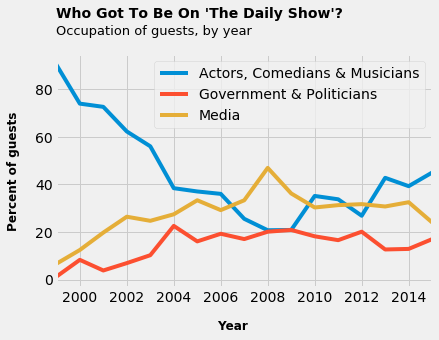

In [290]:
plt.style.use('fivethirtyeight')
fig = plt.figure(dpi=300)

# Plot line graph
ax = tab.plot.line(x='year', y=['ACM Proportion', 'GP Proportion', 'Media Proportion'])

# Title
ax.text(x=1999, y=110, s="Who Got To Be On 'The Daily Show'?", fontsize=14, fontweight='bold');

# Subtitle
ax.text(x=1999, y=103, s="Occupation of guests, by year", fontsize=13);

# Set x-axis label
plt.xlabel(x=.47, y=-1, xlabel="Year", fontsize=12, fontweight="bold", labelpad=15)

# Set y-axis label
plt.ylabel(x=1, y=.5, ylabel="Percent of guests", fontsize=12, fontweight="bold", labelpad=15)

# Legend
ax.legend(['Actors, Comedians & Musicians', 'Government & Politicians', 'Media'])

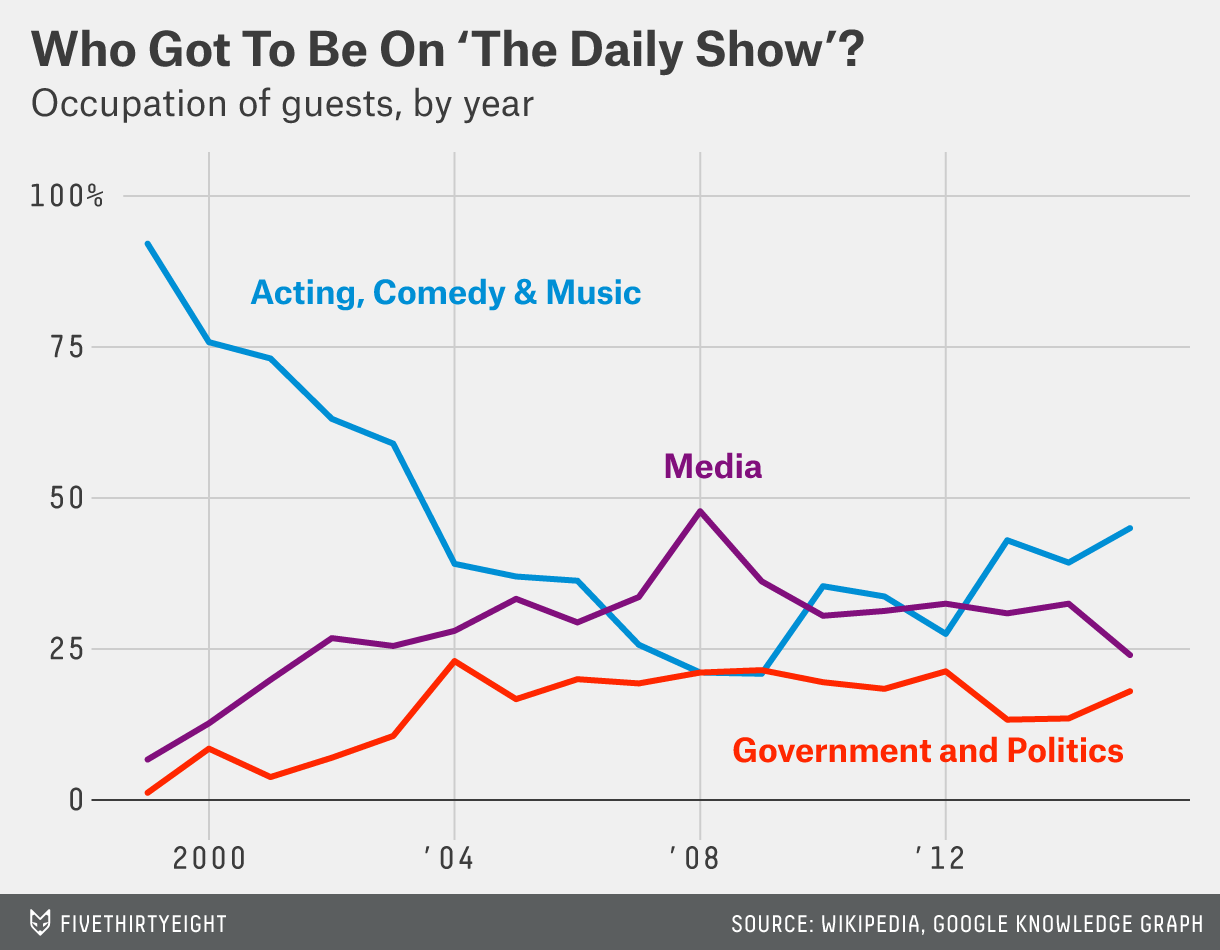

In [291]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(png, width=500)
display(example)

**Hints:**
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume other libraries like altair or plotly would work too.
- If you choose to use seaborn, you may want to upgrade the version to 0.9.0.

**Expectations:** Your plot should include:
- 3 lines visualizing "occupation of guests, by year." The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend or labels for the lines. (But you don't need each label positioned next to its line or colored like 538.)
- Title in the upper left: _"Who Got To Be On 'The Daily Show'?"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Occupation of guests, by year"_

**Optional Bonus Challenge:**
- Give your plot polished aesthetics, with improved resemblance to the 538 example.
- Any visual element not specifically mentioned in the expectations is an optional bonus.

### (OPTIONAL) Part 3 — Who were the top 10 guests on _The Daily Show_?

*This part is not needed to pass the sprint challenge, only to get a 3! Only work on this after completing the other sections.*

**Make a plot** that shows their names and number of appearances.

**Add a title** of your choice.

**Expectations:** It's ok to make a simple, quick plot: exploratory, instead of explanatory. 

**Optional Bonus Challenge:** You can change aesthetics and add more annotation. For example, in a relevant location, could you add the text "19" to show that Fareed Zakaria appeared 19 times on _The Daily Show_? (And so on, for each of the top 10 guests.)

In [0]:
top_guests = df['Guest'].value_counts().sort_values(ascending=False)[:10]

In [310]:
top_guests

Fareed Zakaria    19
Denis Leary       17
Brian Williams    16
Ricky Gervais     13
Paul Rudd         13
Tom Brokaw        12
Bill O'Reilly     10
Reza Aslan        10
Will Ferrell      10
Richard Lewis     10
Name: Guest, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

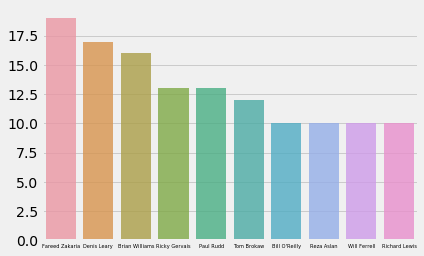

In [340]:
ax = sns.barplot(top_guests.index, top_guests.values, alpha = 0.8)

plt.xticks(fontsize=5)